<a href="https://colab.research.google.com/github/AaronUy/DATANVI/blob/main/DATANVI_Final_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Get data
rate = pd.read_csv('/content/drive/MyDrive/DATANVI/SEA Quarterly GDP Growth Rate.csv')
case = pd.read_csv('/content/drive/MyDrive/DATANVI/SEA Quarterly Active COVID-19 Cases.csv')

In [ ]:
countryNames = countryNames = rate["Country"].tolist()

rate.drop(columns="Country", inplace=True)
rate.set_axis(countryNames, axis=0, inplace=True)
case.drop(columns="Country", inplace=True)
case.set_axis(countryNames, axis=0, inplace=True)

quarters = rate.columns

In [ ]:
rate

,2019-4,2020-1,2020-2,2020-3,2020-4,2021-1
Brunei,7.10,2.570,3.470,0.440,-1.430,0.00
Burma (Myanmar),7.90,6.500,5.300,-0.400,0.000,0.00
Cambodia,7.54,-0.785,-0.785,-0.785,-0.785,0.00
Indonesia,4.97,2.970,-5.320,-3.490,-2.190,-0.74
Laos,5.45,0.110,0.110,0.110,0.110,0.00
Malaysia,4.50,1.400,-3.700,-18.800,-4.500,0.90
Philippines,6.61,-0.730,-16.980,-11.590,-8.260,-4.19
Singapore,1.00,-0.300,-13.300,-5.800,-2.400,0.20
Thailand,1.50,-2.000,-12.100,-6.400,-4.200,-2.60
Timor Leste,18.72,-2.175,-2.175,-2.175,-2.175,0.00


In [ ]:
case

,2019-4,2020-1,2020-2,2020-3,2020-4,2021-1
Brunei,0,83,0,1,5,15
Burma (Myanmar),0,14,71,9308,14879,7428
Cambodia,0,86,11,2,16,1238
Indonesia,0,1311,80694,184401,109963,122524
Laos,0,9,0,1,1,4
Malaysia,0,2186,164,1121,23598,14604
Philippines,0,1947,26015,52702,25024,130245
Singapore,0,683,5381,250,121,202
Thailand,0,1299,57,131,2827,1896
Timor Leste,0,1,0,0,12,415


In [ ]:
rate_t = rate.transpose()
rate_t

,Brunei,Burma (Myanmar),Cambodia,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Timor Leste,Vietnam
2019-4,7.10,7.9,7.540,4.97,5.45,4.5,6.61,1.0,1.5,18.720,6.97
2020-1,2.57,6.5,-0.785,2.97,0.11,1.4,-0.73,-0.3,-2.0,-2.175,3.82
2020-2,3.47,5.3,-0.785,-5.32,0.11,-3.7,-16.98,-13.3,-12.1,-2.175,0.39
2020-3,0.44,-0.4,-0.785,-3.49,0.11,-18.8,-11.59,-5.8,-6.4,-2.175,2.62
2020-4,-1.43,0.0,-0.785,-2.19,0.11,-4.5,-8.26,-2.4,-4.2,-2.175,2.91
2021-1,0.00,0.0,0.000,-0.74,0.00,0.9,-4.19,0.2,-2.6,0.000,4.48


In [ ]:
case_t = case.transpose()
case_t

,Brunei,Burma (Myanmar),Cambodia,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Timor Leste,Vietnam
2019-4,0,0,0,0,0,0,0,0,0,0,0
2020-1,83,14,86,1311,9,2186,1947,683,1299,1,154
2020-2,0,71,11,80694,0,164,26015,5381,57,0,20
2020-3,1,9308,2,184401,1,1121,52702,250,131,0,49
2020-4,5,14879,16,109963,1,23598,25024,121,2827,12,105
2021-1,15,7428,1238,122524,4,14604,130245,202,1896,415,209


# Correlation between GDP Growth Rate and Active COVID-19 Cases by Country

Text(0.5, 1.0, 'Correlation between GDP Growth Rate and Active COVID-19 Cases by Country')

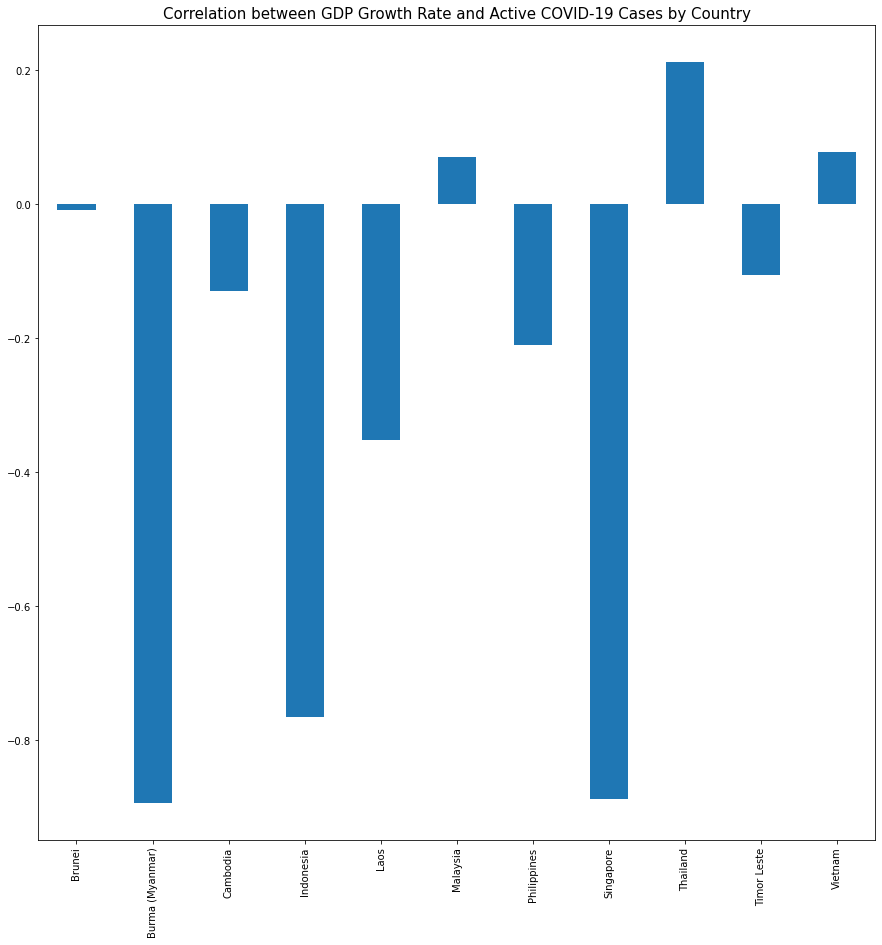

In [ ]:
data = []
col = ["Correlation"]

for i in range(11):
  df = pd.DataFrame(columns=quarters)
  df = df.append(rate.iloc[i])
  df = df.append(case.iloc[i])
  df = df.transpose()
  data.append(df.corr().iloc[0, 1])

fig, axs = plt.subplots(1, 1, figsize=(15,15))
corrCountry = pd.DataFrame(data, columns=col)
corrCountry.set_axis(countryNames, axis=0, inplace=True)
corrCountry.plot(ax=axs, kind="bar", legend=False)
axs.set_title("Correlation between GDP Growth Rate and Active COVID-19 Cases by Country", fontsize=15)

In [ ]:
# Correlation between
# GDP Growth Rate and
# Active COVID-19 Cases
# by Country
# from 2019 4th Quarter
# to 2021 1st Quarter
corrCountry

,Correlation
Brunei,-0.008013
Burma (Myanmar),-0.893701
Cambodia,-0.130043
Indonesia,-0.764716
Laos,-0.352010
Malaysia,0.070130
Philippines,-0.210147
Singapore,-0.888217
Thailand,0.212924
Timor Leste,-0.105064


# GDP Growth Rate per Quarter by Country and Active COVID-19 cases per Quarter by Country

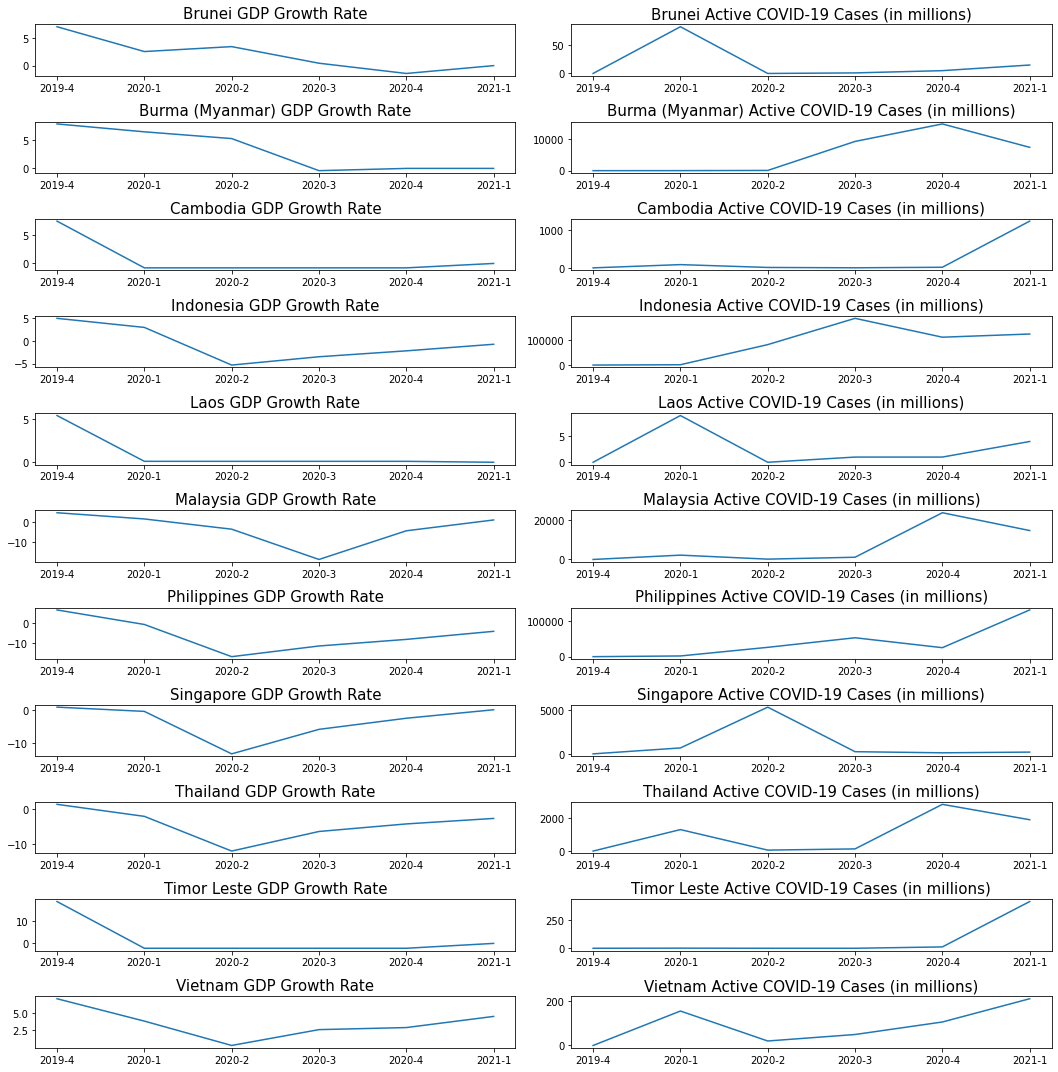

In [ ]:
fig, axs = plt.subplots(11, 2, figsize=(15,15))
for i in range(11):
  country = countryNames[i]
  rate_t[country].plot(ax=axs[i, 0])
  axs[i, 0].set_title(country + " GDP Growth Rate", fontsize=15)
  case_t[country].plot(ax=axs[i, 1])
  axs[i, 1].set_title(country + " Active COVID-19 Cases (in millions)", fontsize=15)

fig.tight_layout()

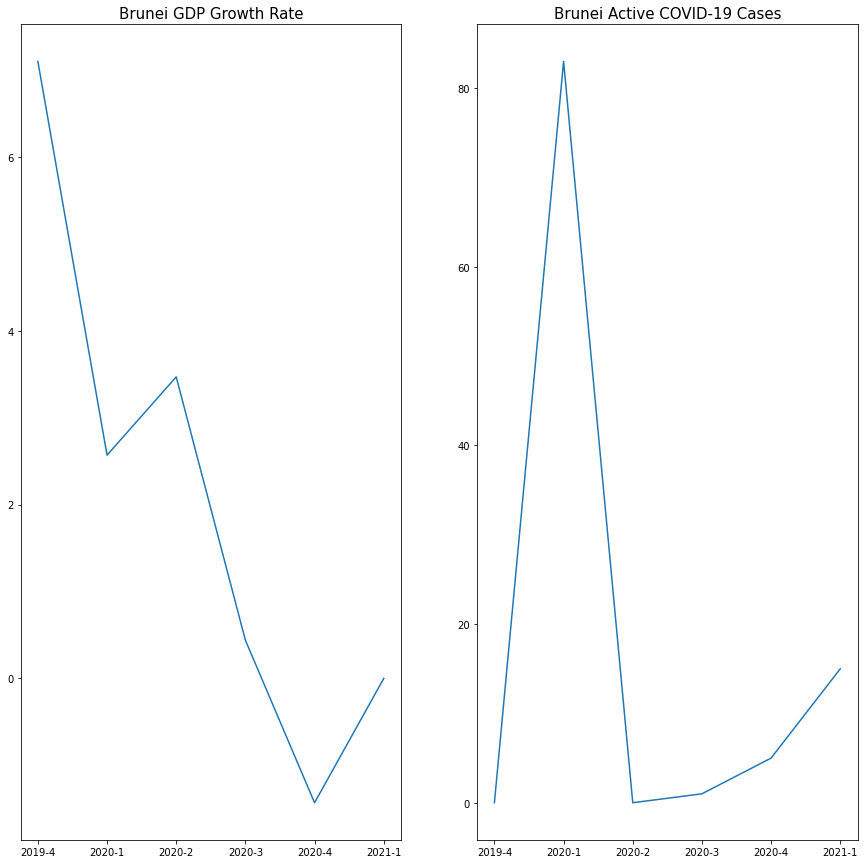

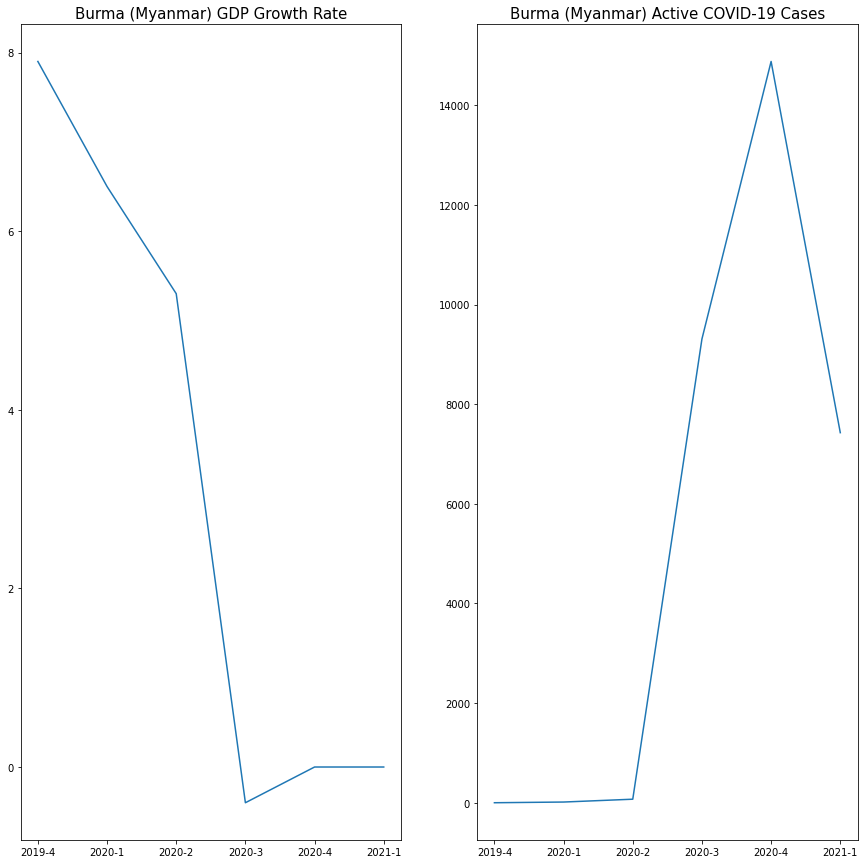

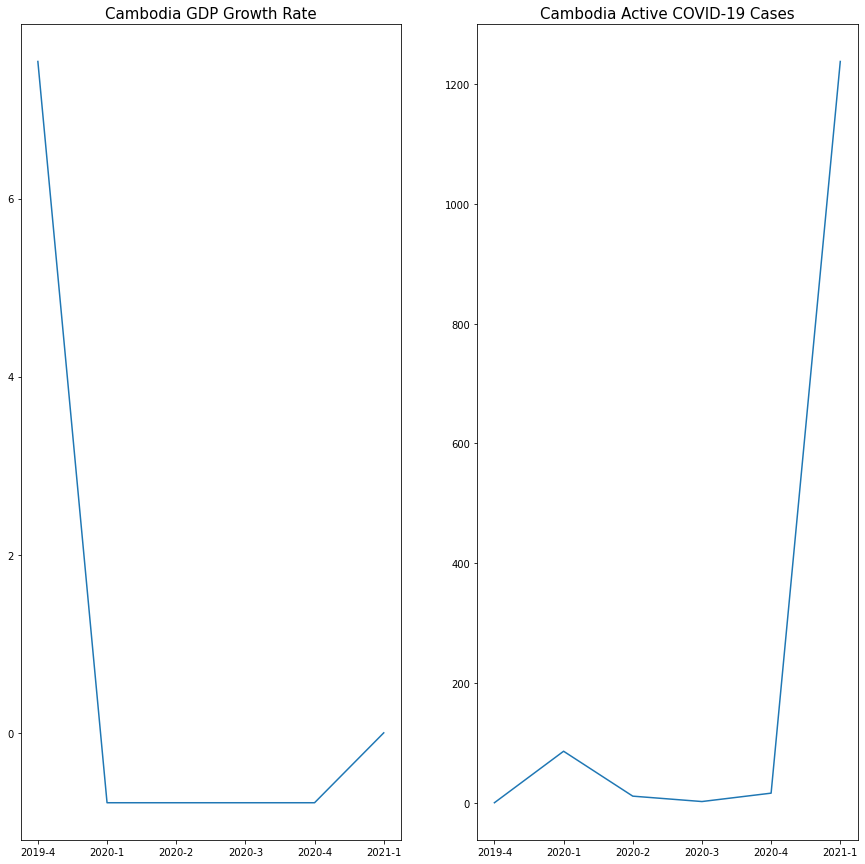

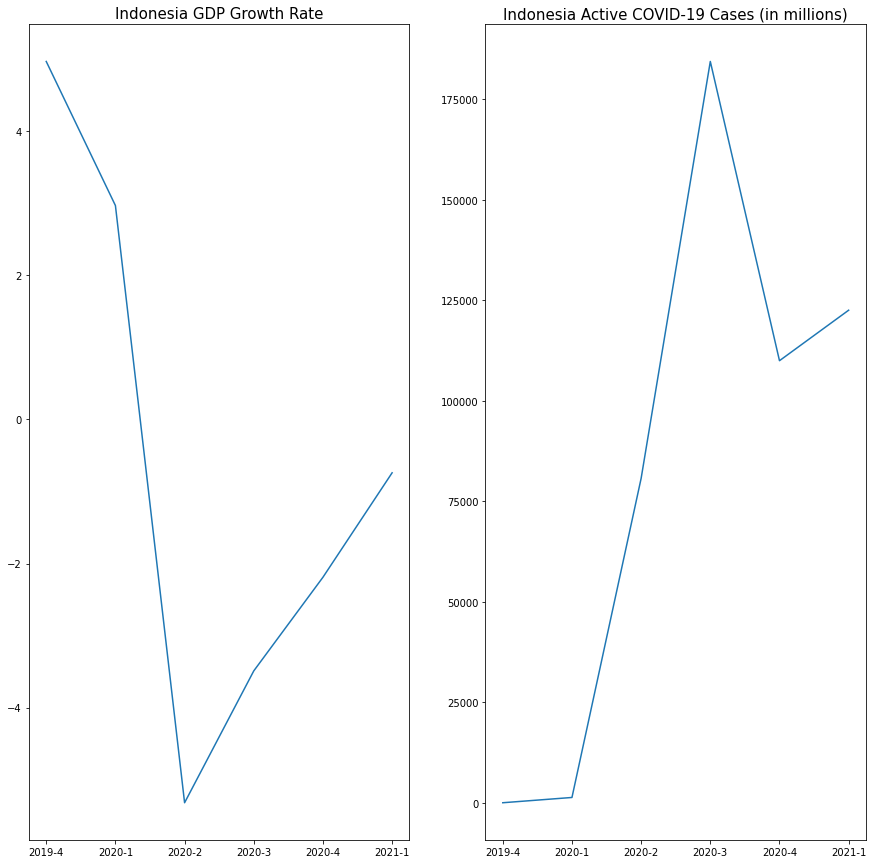

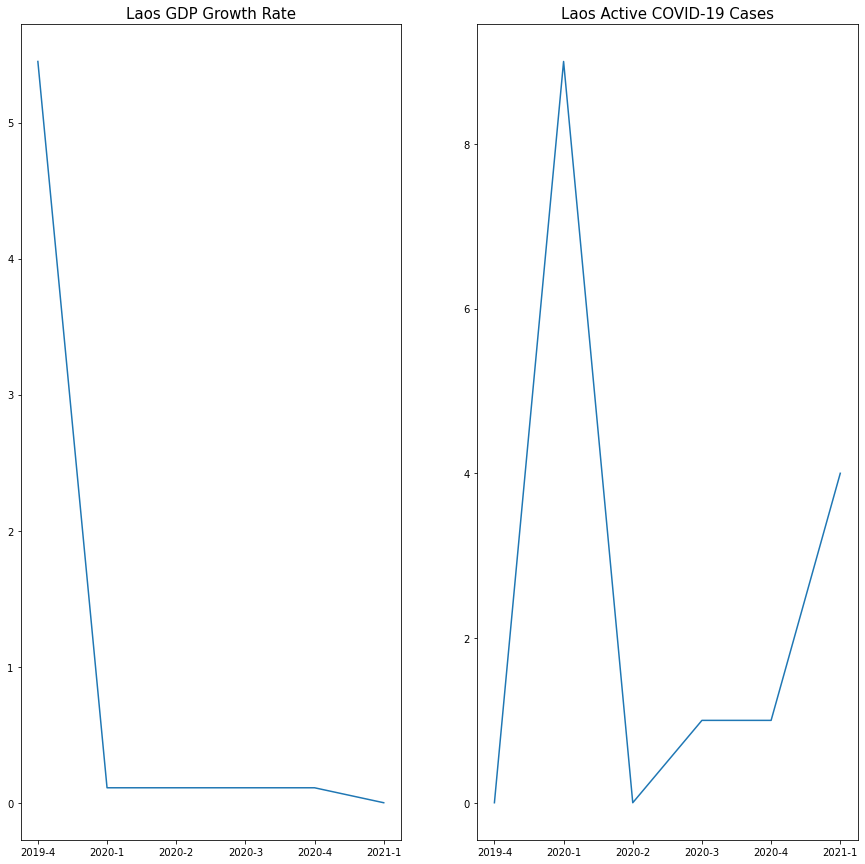

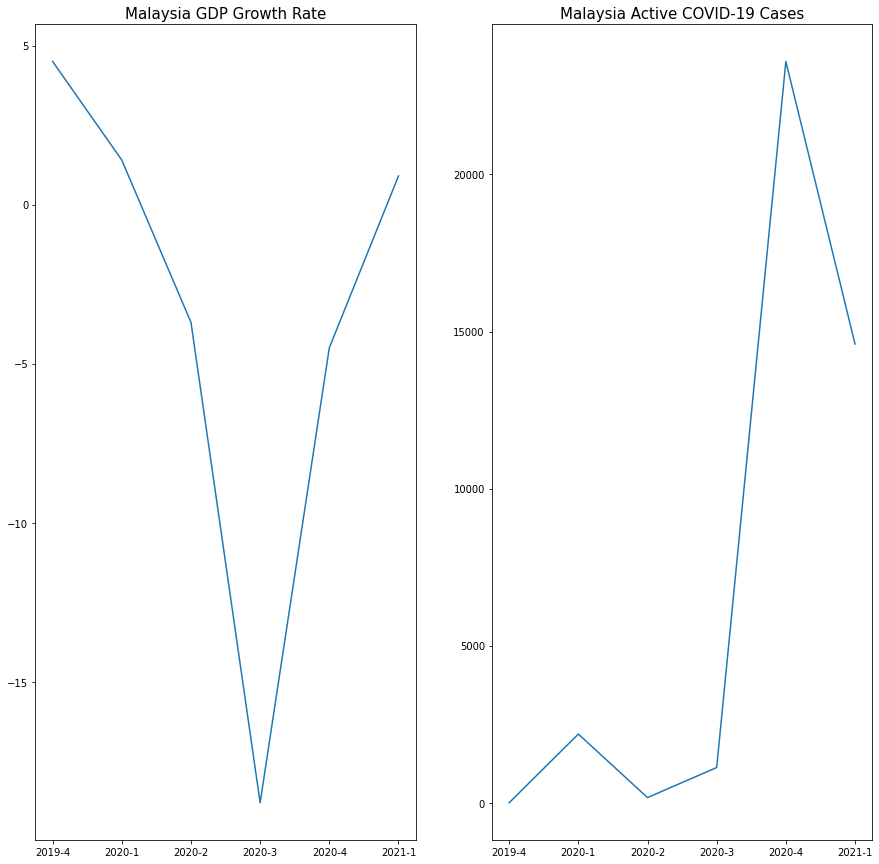

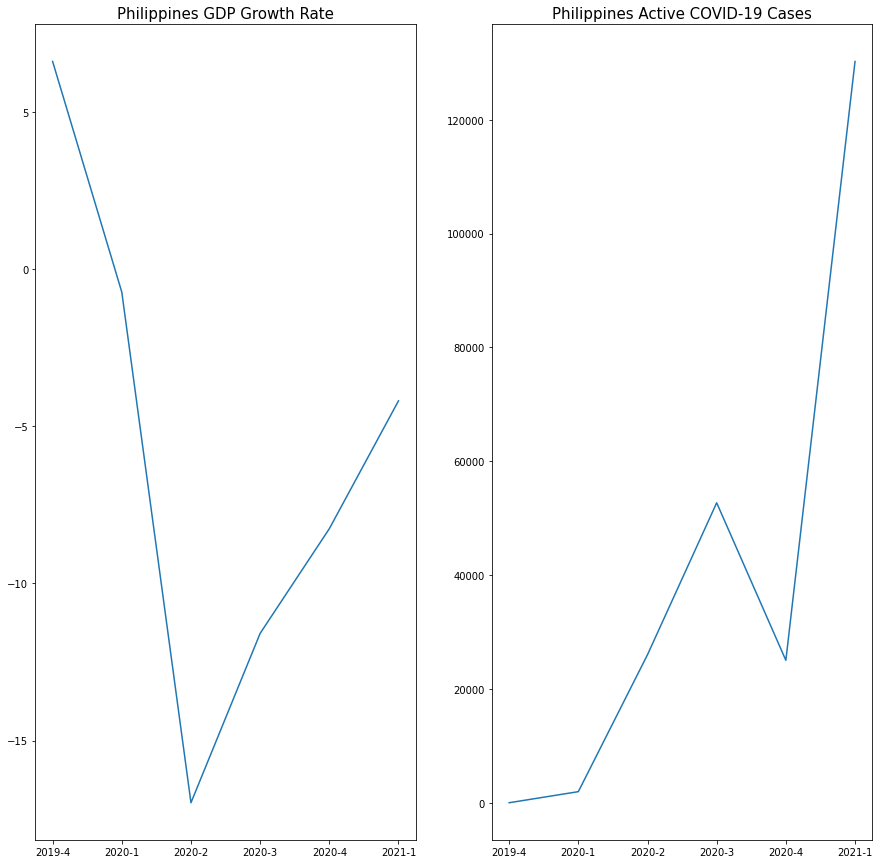

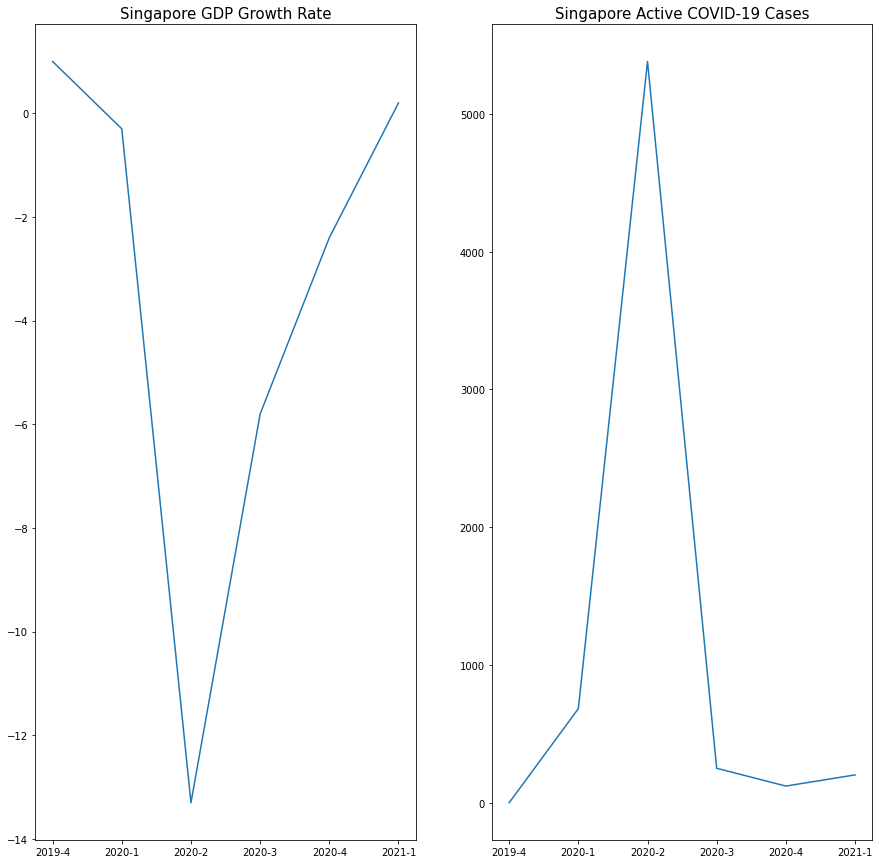

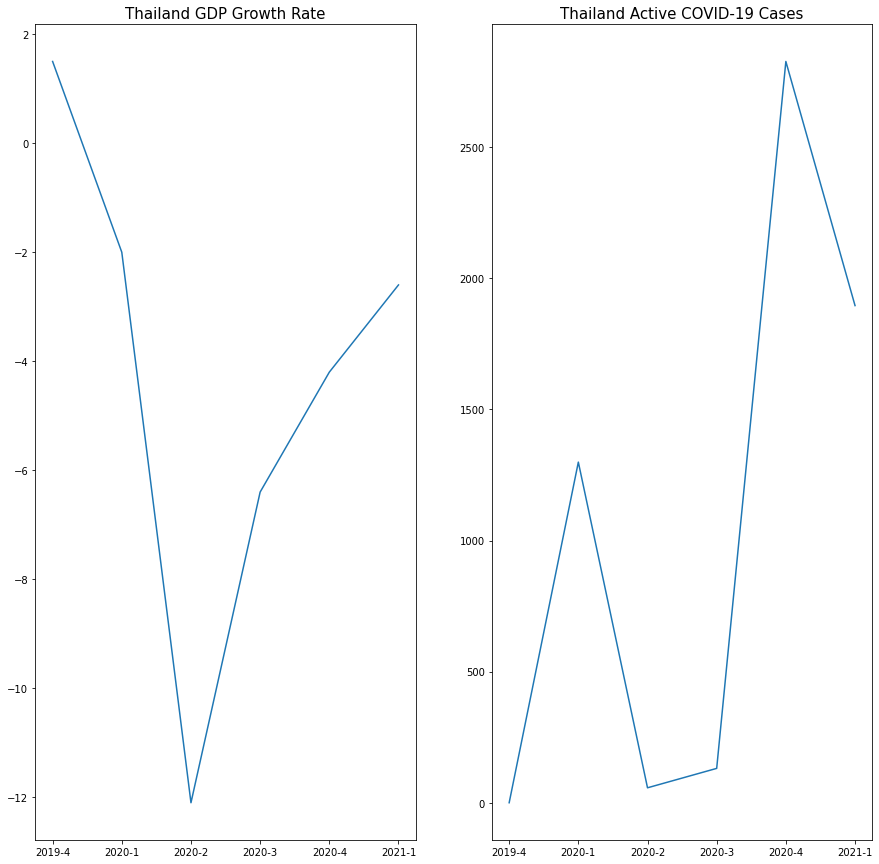

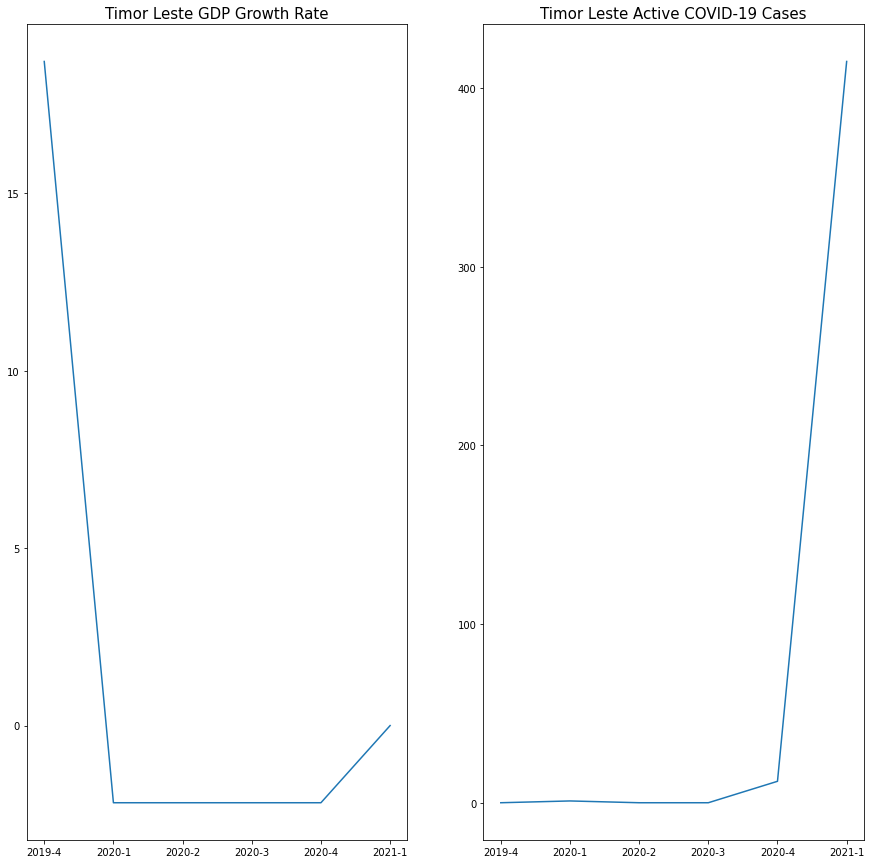

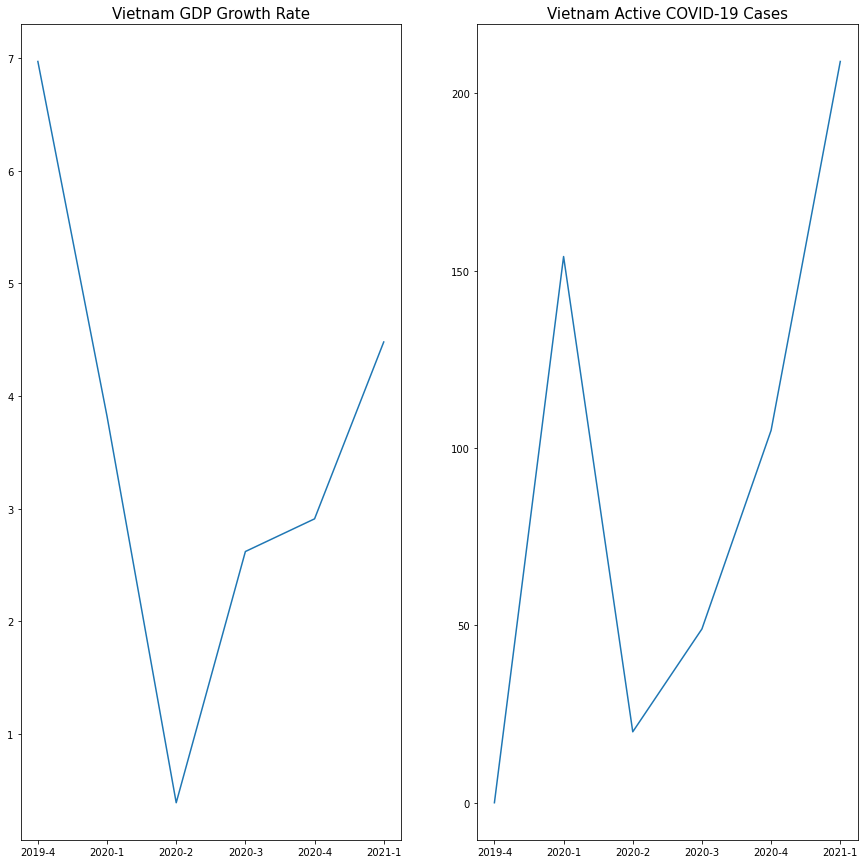

In [ ]:
for i in range(11):
  fig, axs = plt.subplots(1, 2, figsize=(15,15))
  country = countryNames[i]
  rate_t[country].plot(ax=axs[0])
  axs[0].set_title(country + " GDP Growth Rate", fontsize=15)
  case_t[country].plot(ax=axs[1])
  if i == 3:
    axs[1].set_title(country + " Active COVID-19 Cases (in millions)", fontsize=15)
  else:
    axs[1].set_title(country + " Active COVID-19 Cases", fontsize=15)

# GDP Growth Rate per Country by Quarter and Active COVID-19 cases per Country by Quarter

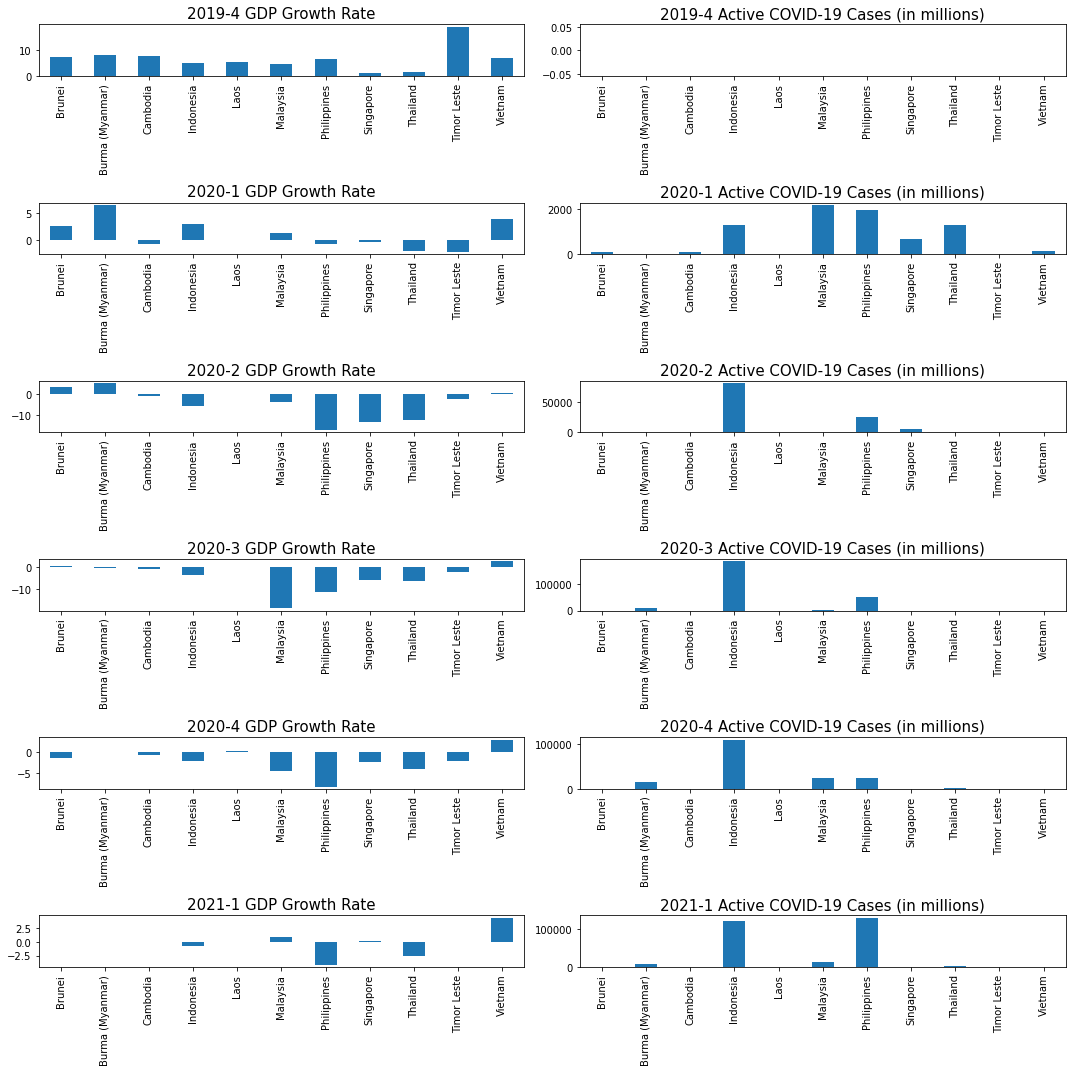

In [ ]:
fig, axs = plt.subplots(6, 2, figsize=(15,15))
for i in range(6):
  rate[quarters[i]].plot(ax=axs[i, 0], kind="bar")
  axs[i, 0].set_title(quarters[i] + " GDP Growth Rate", fontsize=15)
  case[quarters[i]].plot(ax=axs[i, 1], kind="bar")
  axs[i, 1].set_title(quarters[i] + " Active COVID-19 Cases (in millions)", fontsize=15)

fig.tight_layout()

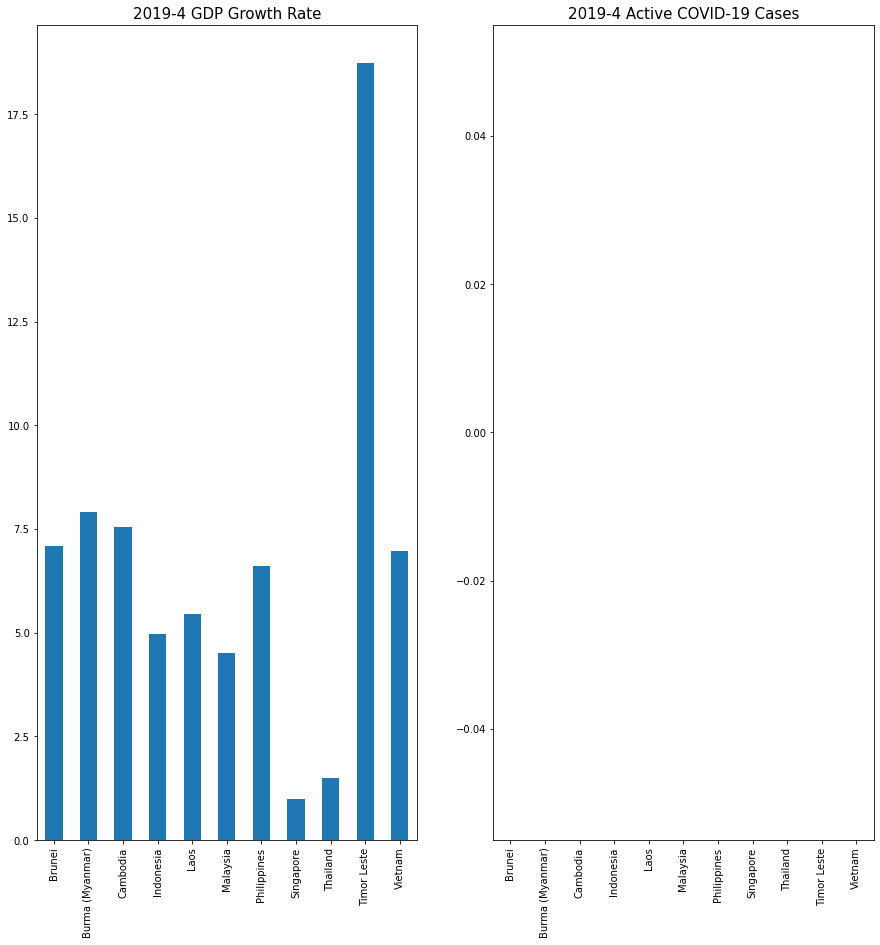

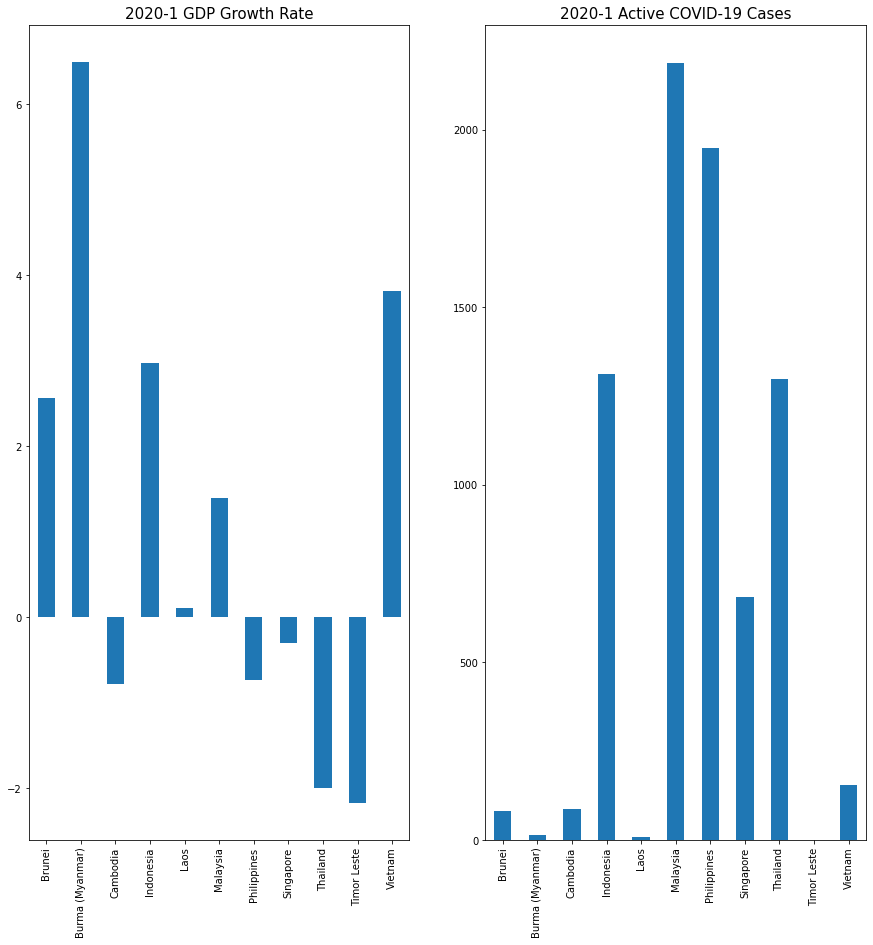

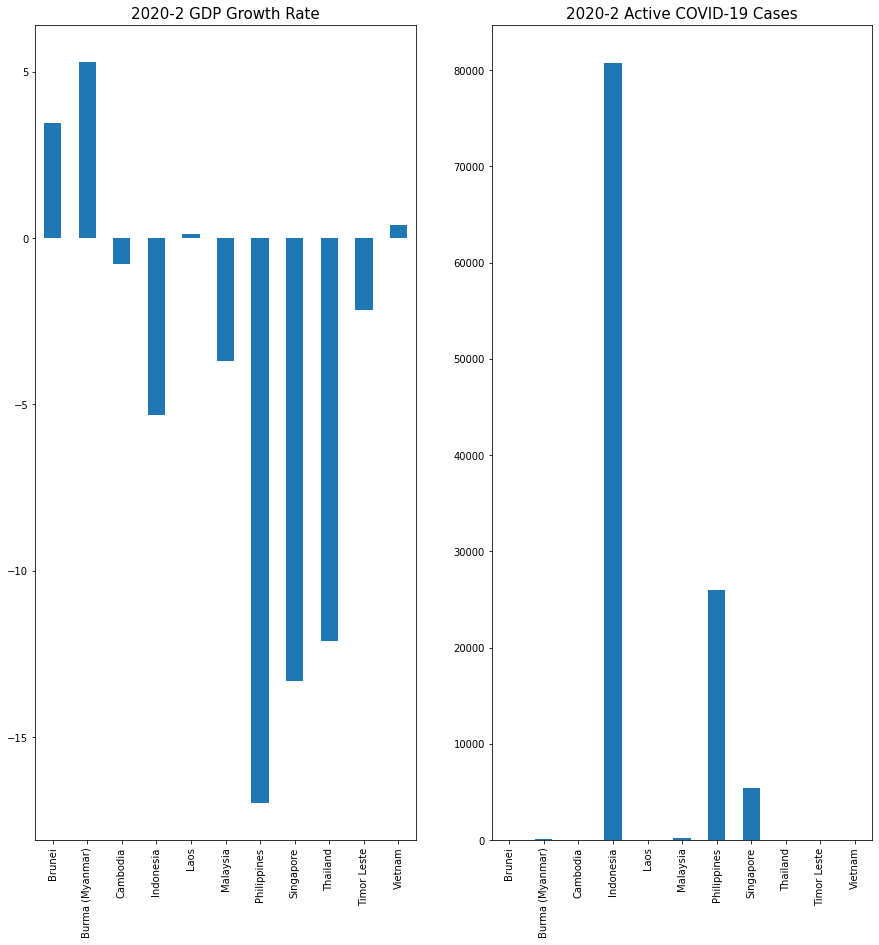

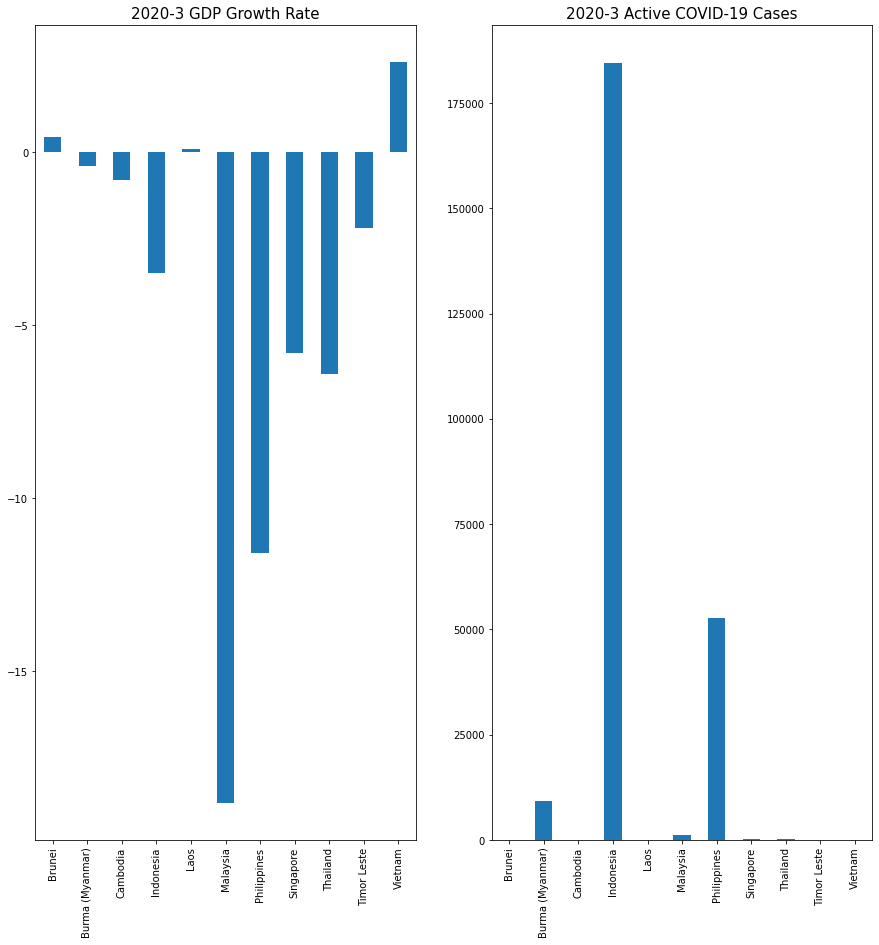

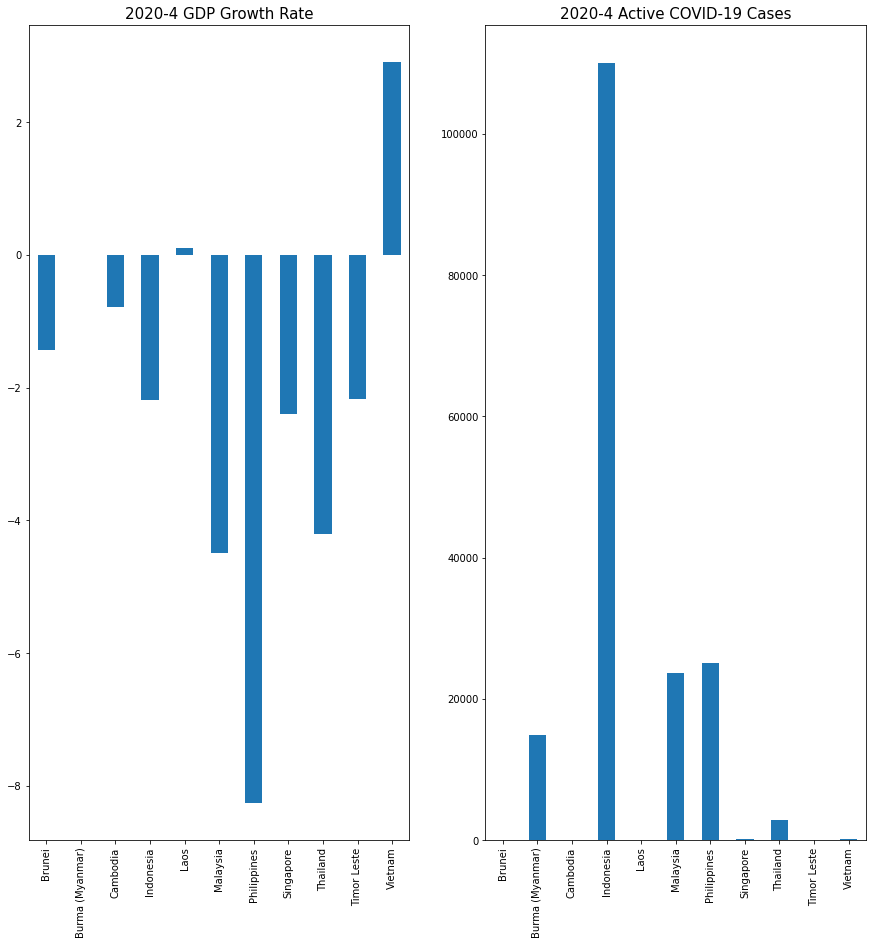

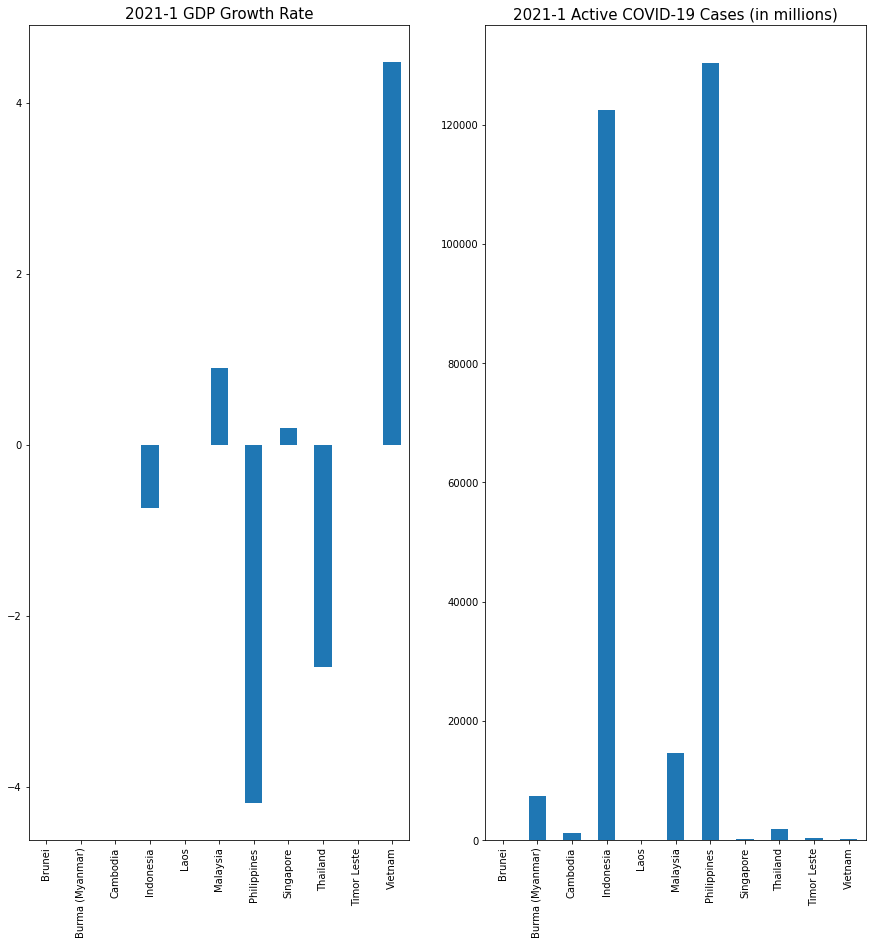

In [ ]:
for i in range(6):
  quarter = quarters[i]
  fig, axs = plt.subplots(1, 2, figsize=(15,15))
  rate[quarter].plot(ax=axs[0], kind="bar")
  axs[0].set_title(quarter + " GDP Growth Rate", fontsize=15)
  case[quarter].plot(ax=axs[1], kind="bar")
  if i == 5:
    axs[1].set_title(quarter + " Active COVID-19 Cases (in millions)", fontsize=15)
  else:
    axs[1].set_title(quarter + " Active COVID-19 Cases", fontsize=15)

# All Countries plotted together: GDP Growth Rate per Quarter and Active COVID-19 cases per Quarter

Text(0.5, 1.0, 'Active COVID-19 Cases (in millions)')

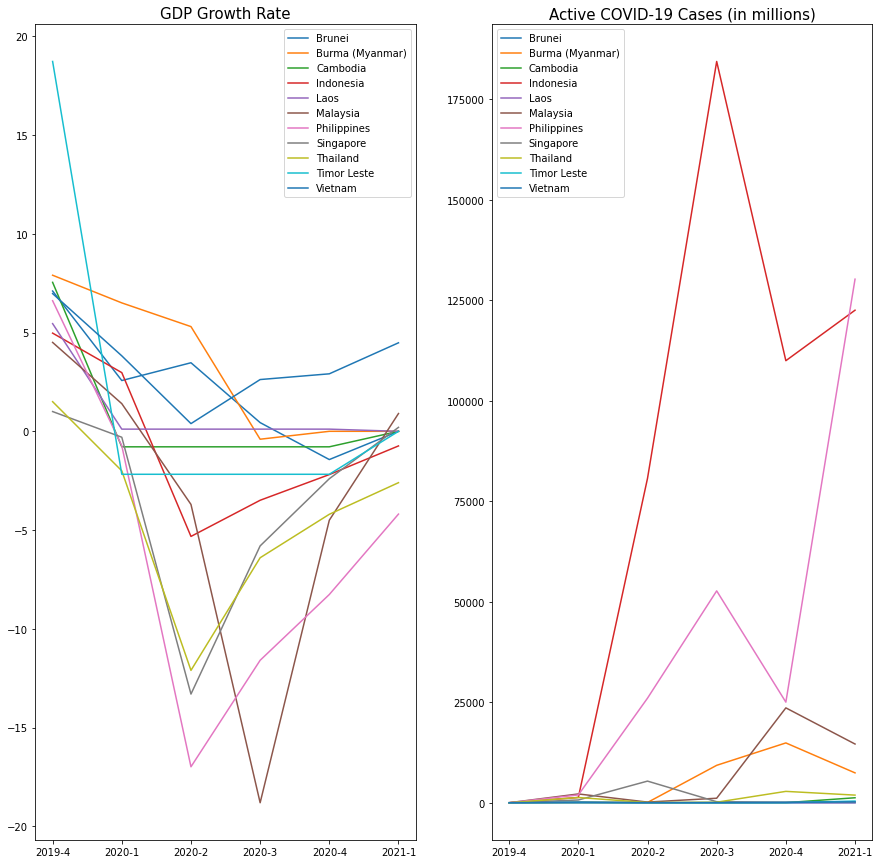

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))

rate_t.plot(ax=axs[0])
axs[0].set_title("GDP Growth Rate", fontsize=15)
case_t.plot(ax=axs[1])
axs[1].set_title("Active COVID-19 Cases (in millions)", fontsize=15)

# All Quarters plotted together: GDP Growth Rate per Country and Active COVID-19 cases per Country

Text(0.5, 1.0, 'Active COVID-19 Cases (in millions)')

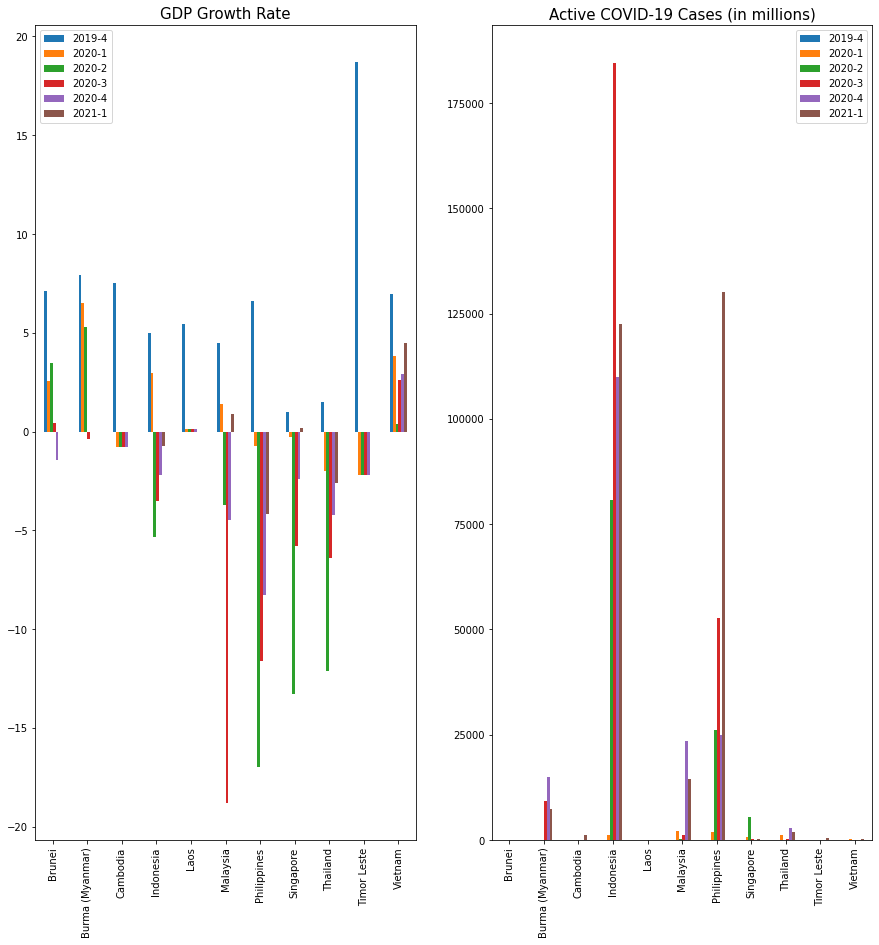

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))

rate.plot.bar(ax=axs[0])
axs[0].set_title("GDP Growth Rate", fontsize=15)
case.plot.bar(ax=axs[1])
axs[1].set_title("Active COVID-19 Cases (in millions)", fontsize=15)